In [162]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import string
import copy

In [163]:
class Bandit():
    
    def __init__(self):
        self.q = np.random.normal(loc=0, scale=1.0)
        self.n = 0
        self.Q = 1e-10
        self.id = ''.join(random.choices(string.ascii_uppercase + string.digits, k=30)).lower()
        
    def reward(self):
        reward = np.random.normal(loc=self.q, scale=1.0)
        self.n+=1
        self.Q = self.Q + (1/self.n) * (reward - self.Q)
        return reward

    def optimistic(self, val=5):
        self.Q = val

Arm 1: -0.8704429861758738
Arm 2: 0.1827377098767221
Arm 3: -0.8926378314601255
Arm 4: 0.8143836670923996
Arm 5: 0.5611248213233332
Arm 6: 0.1281269344277868
Arm 7: -1.1134083143389506
Arm 8: -1.0136692597333392
Arm 9: -1.1342680451962206
Arm 10: 0.6643980919716357


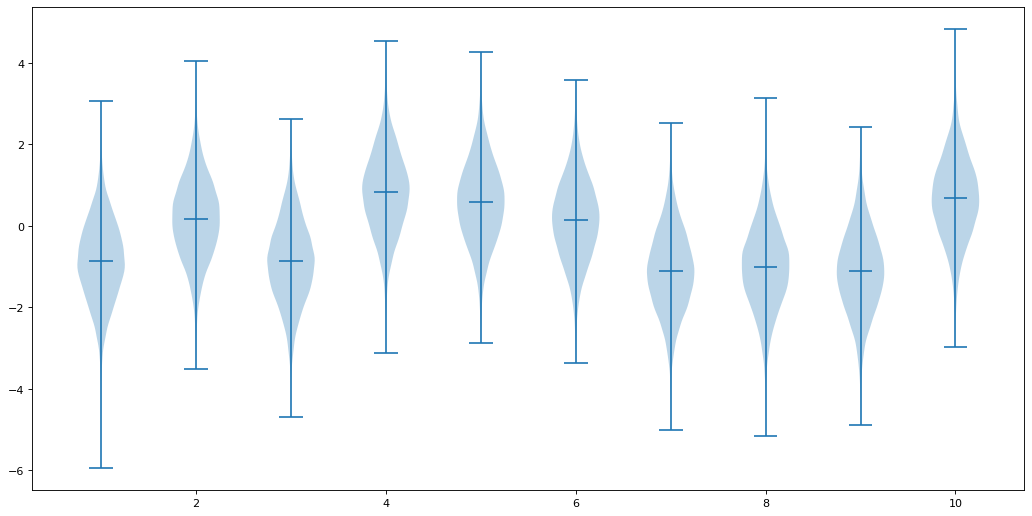

In [170]:
# proof of distributions working
plt.figure(figsize=(16, 8), dpi=80)

pos = [1,2,3,4,5,6,7,8,9,10]
arms = list(Bandit() for bandit in range(k))
samples = np.array([arm.reward() for i in range(10000) for arm in arms])
fig = plt.violinplot(samples.reshape(10000,10), pos, showmeans=True)
for num, arm in enumerate(arms):
    print("Arm {}: {}".format(num+1, arm.q))

In [180]:
k = 10
e = 0.1
runs = 2000
steps = 1000

avgopt = []

e00  = {'rewards':[], 'optchoice':[]}
e01  = {'rewards':[], 'optchoice':[]}
e10  = {'rewards':[], 'optchoice':[]}

for run in tqdm(range(runs)):

    arms = list(Bandit() for bandit in range(k))
    e00_arms  = copy.deepcopy(arms)
    e01_arms = copy.deepcopy(arms)
    e10_arms  = copy.deepcopy(arms)
    
    opt = max(arms, key=lambda x: x.q)
    
    e00_rew = []
    e00_opts = []
    e01_rew = []
    e01_opts = []
    e10_rew = []
    e10_opts = []
    
    for step in range(steps):
        
        #e00
        explore = np.random.choice(a=[False, True], size=1, p=[1-0.0, 0.0])
        choice = np.random.choice(e00_arms) if explore else max(e00_arms, key=lambda x: x.Q)
        e00_rew.append(choice.reward())
        e00_opts.append(1) if (choice.id == opt.id) else e00_opts.append(0)
        
        #e01
        explore = np.random.choice(a=[False, True], size=1, p=[1-0.01, 0.01])
        choice = np.random.choice(e01_arms) if explore else max(e01_arms, key=lambda x: x.Q)
        e01_rew.append(choice.reward())
        e01_opts.append(1) if (choice.id == opt.id) else e01_opts.append(0)
        
        #e10
        explore = np.random.choice(a=[False, True], size=1, p=[1-0.10, 0.10])
        choice = np.random.choice(e10_arms) if explore else max(e10_arms, key=lambda x: x.Q)
        e10_rew.append(choice.reward())
        e10_opts.append(1) if (choice.id == opt.id) else e10_opts.append(0)


    avgopt.append(opt.q)
    
    e00['rewards'].append(e00_rew)
    e00['optchoice'].append(e00_opts)
    
    e01['rewards'].append(e01_rew)
    e01['optchoice'].append(e01_opts)
    
    e10['rewards'].append(e10_rew)
    e10['optchoice'].append(e10_opts)

100%|██████████| 2000/2000 [04:17<00:00,  7.76it/s]


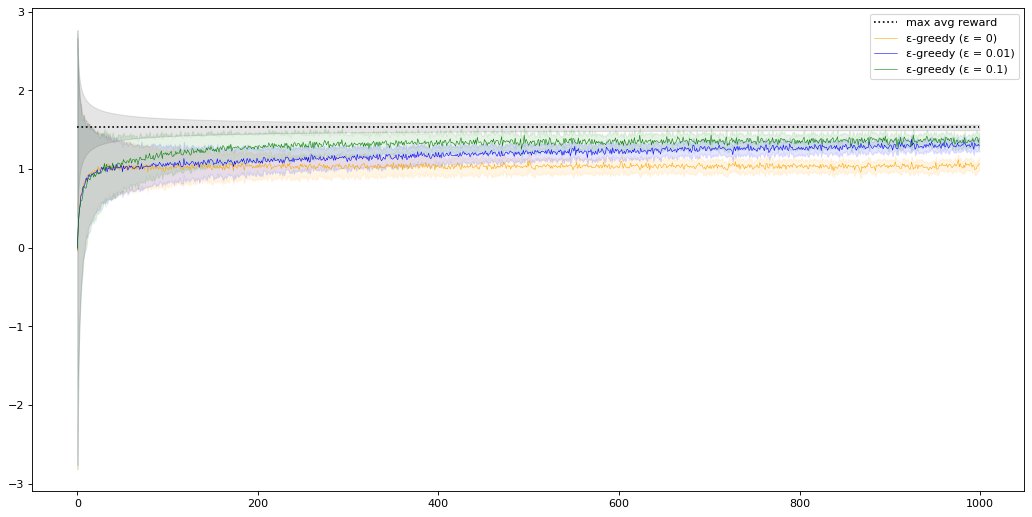

In [181]:
# Figure 2.3
plt.figure(figsize=(16, 8), dpi=80)

# Maximum average reward constant
opt_err = 1.96 * (np.std(avgopt) / np.sqrt(range(1,1001)))
plt.plot([np.average(avgopt)]*1000, ':', color='black', label='max avg reward')
plt.fill_between(range(1000), np.average(avgopt) - opt_err, np.average(avgopt) + opt_err, alpha=0.1, color='black')

# e00
rew_err = 1.96 * (np.std(e00['rewards'], axis=0) / np.sqrt(range(1,1001)))
plt.plot(np.average(e00['rewards'], axis=0), linewidth=0.5, color='orange', label="ε-greedy (ε = 0)")
plt.fill_between(range(1000), np.average(e00['rewards'], axis=0) - rew_err, np.average(e00['rewards'], axis=0) + rew_err, alpha=0.1, color='orange')

# e01
rew_err = 1.96 * (np.std(e01['rewards'], axis=0) / np.sqrt(range(1,1001)))
plt.plot(np.average(e01['rewards'], axis=0), color='blue', linewidth=0.5, label="ε-greedy (ε = 0.01)")
plt.fill_between(range(1000), np.average(e01['rewards'], axis=0) - rew_err, np.average(e01['rewards'], axis=0) + rew_err, alpha=0.1, color='blue')

# e10
rew_err = 1.96 * (np.std(e10['rewards'], axis=0) / np.sqrt(range(1,1001)))
plt.plot(np.average(e10['rewards'], axis=0), color='green', linewidth=0.5, label="ε-greedy (ε = 0.1)")
plt.fill_between(range(1000), np.average(e10['rewards'], axis=0) - rew_err, np.average(e10['rewards'], axis=0) + rew_err, alpha=0.1, color='green')

plt.legend()

<Figure size 432x288 with 0 Axes>

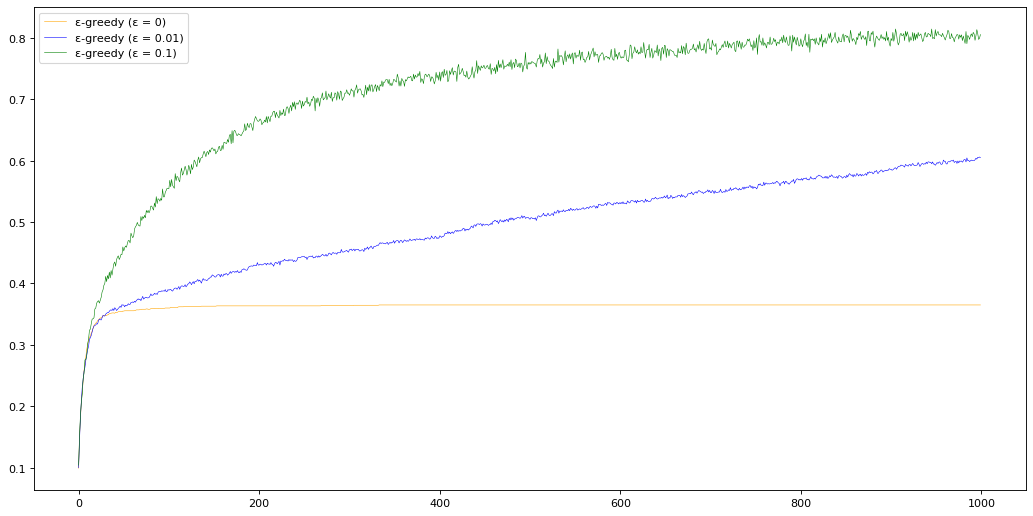

In [182]:
# Figure 2.3
plt.clf()
plt.figure(figsize=(16, 8), dpi=80)
plt.plot(np.sum(e00['optchoice'], axis=0) * (1/runs), linewidth=0.5, color='orange', label="ε-greedy (ε = 0)")
plt.plot(np.sum(e01['optchoice'], axis=0) * (1/runs), color='blue', linewidth=0.5, label="ε-greedy (ε = 0.01)")
plt.plot(np.sum(e10['optchoice'], axis=0) * (1/runs), color='green', linewidth=0.5, label="ε-greedy (ε = 0.1)")
plt.legend()

In [183]:
k = 10
e = 0.1
runs = 2000
steps = 1000

avgopt = []

q0e0  = {'rewards':[], 'optchoice':[]}
q5e0  = {'rewards':[], 'optchoice':[]}
q0e1  = {'rewards':[], 'optchoice':[]}
q5e1  = {'rewards':[], 'optchoice':[]}
ucbc2 = {'rewards':[], 'optchoice':[]}

for run in tqdm(range(runs)):

    arms       = list(Bandit() for bandit in range(k))
    q0e0_arms  = copy.deepcopy(arms)
    q5e0_arms  = copy.deepcopy(arms)
    q0e1_arms  = copy.deepcopy(arms)
    q5e1_arms  = copy.deepcopy(arms)
    ucbc2_arms = copy.deepcopy(arms)
    
    for q5e0_arm, q5e1_arm in zip(q5e0_arms, q5e1_arms):
        q5e0_arm.optimistic()
        q5e0_arm.optimistic()
    
    opt = max(arms, key=lambda x: x.q)
    
    q0e0_rew = []
    q0e0_opts = []
    q5e0_rew = []
    q5e0_opts = []
    q0e1_rew = []
    q0e1_opts = []
    q5e1_rew = []
    q5e1_opts = []
    ucbc2_rew = []
    ucbc2_opts = []
    
    for step in range(steps):
        
        #q0e0
        choice = max(q0e0_arms, key=lambda x: x.Q)
        q0e0_rew.append(choice.reward())
        q0e0_opts.append(1) if (choice.id == opt.id) else q0e0_opts.append(0)            
            
        #q5e0
        choice = max(q5e0_arms, key=lambda x: x.Q)
        q5e0_rew.append(choice.reward())
        q5e0_opts.append(1) if (choice.id == opt.id) else q5e0_opts.append(0)            
            
        #q0e1
        explore = np.random.choice(a=[False, True], size=1, p=[1-0.1, 0.1])
        choice = np.random.choice(q0e1_arms) if explore else max(q0e1_arms, key=lambda x: x.Q)
        q0e1_rew.append(choice.reward())
        q0e1_opts.append(1) if (choice.id == opt.id) else q0e1_opts.append(0)
        
        #q5e1
        explore = np.random.choice(a=[False, True], size=1, p=[1-0.1, 0.1])
        choice = np.random.choice(q5e1_arms) if explore else max(q5e1_arms, key=lambda x: x.Q)
        q5e1_rew.append(choice.reward())
        q5e1_opts.append(1) if (choice.id == opt.id) else q5e1_opts.append(0)
        
        #ucbc2
        choice = max(ucbc2_arms, key=lambda x: x.Q + (2 * (np.log(step) / x.n)))
        ucbc2_rew.append(choice.reward())
        ucbc2_opts.append(1) if (choice.id == opt.id) else ucbc2_opts.append(0)

    avgopt.append(opt.q)
    
    q0e0['rewards'].append(q0e0_rew)
    q0e0['optchoice'].append(q0e0_opts)
    
    q5e0['rewards'].append(q5e0_rew)
    q5e0['optchoice'].append(q5e0_opts)
    
    q0e1['rewards'].append(q0e1_rew)
    q0e1['optchoice'].append(q0e1_opts)
    
    q5e1['rewards'].append(q5e1_rew)
    q5e1['optchoice'].append(q5e1_opts)
    
    ucbc2['rewards'].append(ucbc2_rew)
    ucbc2['optchoice'].append(ucbc2_opts)

  0%|          | 0/2000 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in double_scalars
100%|██████████| 2000/2000 [04:26<00:00,  7.50it/s]


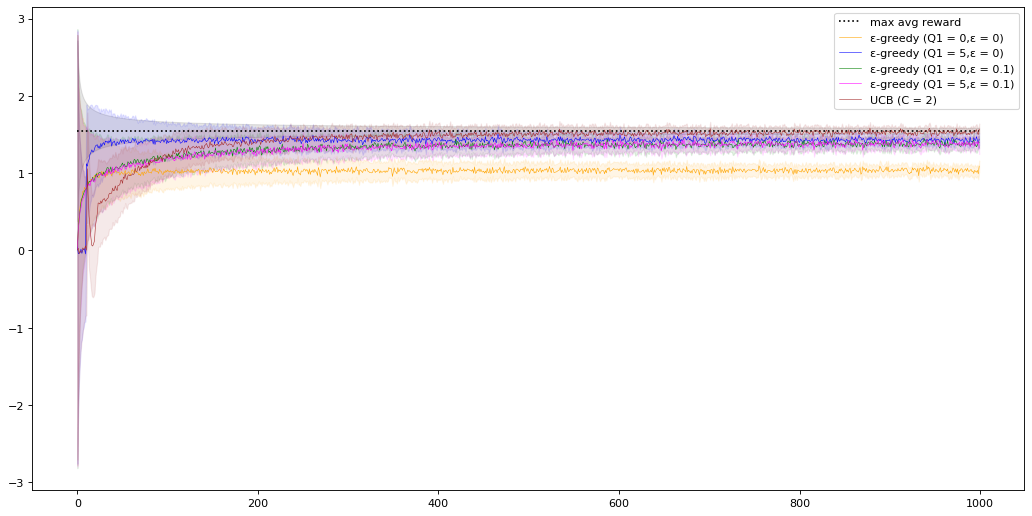

In [186]:
# Figure 2.3
plt.figure(figsize=(16, 8), dpi=80)

# Maximum average reward constant
opt_err = 1.96 * (np.std(avgopt) / np.sqrt(range(1,1001)))
plt.plot([np.average(avgopt)]*1000, ':', color='black', label='max avg reward')
plt.fill_between(range(1000), np.average(avgopt) - opt_err, np.average(avgopt) + opt_err, alpha=0.1, color='black')

# q0e0
rew_err = 1.96 * (np.std(q0e0['rewards'], axis=0) / np.sqrt(range(1,1001)))
plt.plot(np.average(q0e0['rewards'], axis=0), linewidth=0.5, color='orange', label="ε-greedy (Q1 = 0,ε = 0)")
plt.fill_between(range(1000), np.average(q0e0['rewards'], axis=0) - rew_err, np.average(q0e0['rewards'], axis=0) + rew_err, alpha=0.1, color='orange')

# q5e0
rew_err = 1.96 * (np.std(q5e0['rewards'], axis=0) / np.sqrt(range(1,1001)))
plt.plot(np.average(q5e0['rewards'], axis=0), color='blue', linewidth=0.5, label="ε-greedy (Q1 = 5,ε = 0)")
plt.fill_between(range(1000), np.average(q5e0['rewards'], axis=0) - rew_err, np.average(q5e0['rewards'], axis=0) + rew_err, alpha=0.1, color='blue')

# q0e1
rew_err = 1.96 * (np.std(q0e1['rewards'], axis=0) / np.sqrt(range(1,1001)))
plt.plot(np.average(q0e1['rewards'], axis=0), color='green', linewidth=0.5, label="ε-greedy (Q1 = 0,ε = 0.1)")
plt.fill_between(range(1000), np.average(q0e1['rewards'], axis=0) - rew_err, np.average(q0e1['rewards'], axis=0) + rew_err, alpha=0.1, color='green')

# q5e1
rew_err = 1.96 * (np.std(q5e1['rewards'], axis=0) / np.sqrt(range(1,1001)))
plt.plot(np.average(q5e1['rewards'], axis=0), color='magenta', linewidth=0.5, label="ε-greedy (Q1 = 5,ε = 0.1)")
plt.fill_between(range(1000), np.average(q5e1['rewards'], axis=0) - rew_err, np.average(q5e1['rewards'], axis=0) + rew_err, alpha=0.1, color='magenta')

# ucbc2
rew_err = 1.96 * (np.std(ucbc2['rewards'], axis=0) / np.sqrt(range(1,1001)))
plt.plot(np.average(ucbc2['rewards'], axis=0), color='brown', linewidth=0.5, label="UCB (C = 2)")
plt.fill_between(range(1000), np.average(ucbc2['rewards'], axis=0) - rew_err, np.average(ucbc2['rewards'], axis=0) + rew_err, alpha=0.1, color='brown')

plt.legend()

<Figure size 432x288 with 0 Axes>

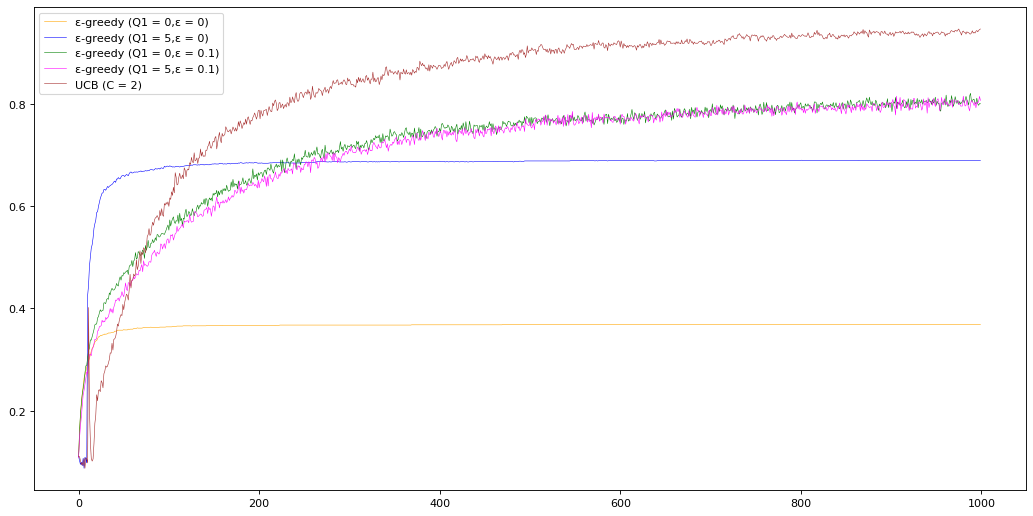

In [187]:
# Figure 2.3
plt.clf()
plt.figure(figsize=(16, 8), dpi=80)
plt.plot(np.sum(q0e0['optchoice'], axis=0) * (1/runs), linewidth=0.5, color='orange', label="ε-greedy (Q1 = 0,ε = 0)")
plt.plot(np.sum(q5e0['optchoice'], axis=0) * (1/runs), color='blue', linewidth=0.5, label="ε-greedy (Q1 = 5,ε = 0)")
plt.plot(np.sum(q0e1['optchoice'], axis=0) * (1/runs), color='green', linewidth=0.5, label="ε-greedy (Q1 = 0,ε = 0.1)")
plt.plot(np.sum(q5e1['optchoice'], axis=0) * (1/runs), color='magenta', linewidth=0.5, label="ε-greedy (Q1 = 5,ε = 0.1)")
plt.plot(np.sum(ucbc2['optchoice'], axis=0) * (1/runs), color='brown', linewidth=0.5, label="UCB (C = 2)")
plt.legend()